In [2]:
!pip install scikit-learn-extra

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/819.0 kB ? eta -:--:--
     ----------------------------------- - 786.4/819.0 kB 15.6 MB/s eta 0:00:01
     ---------------------------------------- 819.0/819.0 kB 12.8 MB/s  0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for scikit-learn-extra: filename=scikit_learn_extra-0.3.0-cp313-cp313-win_amd64.whl size=375996 sha256=1bcd1568adc942f379f18fc9e45b33664c0d043c1f229d6db1f509ed3ca7a9d9
  Stored in directory: c:\users\ricar\appdata\local\pip\cache\wheels\17\4b\b8\6b6711681d0981b110c9cc91ad6d1ebd88adf1547e1da301fc
Successfully built scikit-learn-extra


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.compose import ColumnTransformer
from sklearn.metrics import pairwise_distances
from sklearn_extra.cluster import KMedoids

# Set default visualization styles
sns.set_theme(style="whitegrid", context="talk")
plt.rcParams["figure.figsize"] = (12, 7)

print("Libraries imported successfully.")


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\ricar\Desktop\UNI\MIA\2Ano\TAAC\project\.venv\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "c:\Users\ricar\Desktop\UNI\MIA\2Ano\TAAC\project\.venv\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "c:\Users\ricar\Desktop\UNI\MIA\2Ano\TAAC\project\.venv\Lib\site-packages\ipykernel\kernelapp.py", 

ImportError: numpy.core.multiarray failed to import (auto-generated because you didn't call 'numpy.import_array()' after cimporting numpy; use '<void>numpy._import_array' to disable if you are certain you don't need it).

In [11]:

# Load the dataset
try:
    df = pd.read_csv('data.csv', sep=';')
    print(f"Data loaded successfully. Shape: {df.shape}")
except FileNotFoundError:
    print("Error: 'data.csv' not found. Please check the file path.")


# --- Define Case Study (Task 1) ---
# For a clear classification task, we should focus on the final outcomes.
# 'Enrolled' is a current status, not a final outcome.
# We will filter the dataframe to only include 'Dropout' and 'Graduate'.
final_outcomes = ['Dropout', 'Graduate']
df_processed = df[df['Target'].isin(final_outcomes)].copy()

# Define the target variable
target_col = 'Target'

# Define features for analysis (based on the dataset columns)
# We select a mix of numerical and categorical features that are likely relevant
numeric_features = [
    'Age at enrollment',
    'Admission grade',
    'Previous qualification (grade)',
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (grade)',
    'Unemployment rate',
    'Inflation rate'
]

categorical_features = [
    'Marital status',
    'Course',
    'Scholarship holder',
    'Gender',
    'Tuition fees up to date',
    'Debtor'
]

# Display the first few rows and the new shape
print(f"Data filtered for final outcomes. New shape: {df_processed.shape}")
print(df_processed[target_col].value_counts())
df_processed.head()

Data loaded successfully. Shape: (4424, 37)
Data filtered for final outcomes. New shape: (3630, 37)
Target
Graduate    2209
Dropout     1421
Name: count, dtype: int64


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


C:\Users\ricar\AppData\Local\Temp\ipykernel_25688\118838114.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


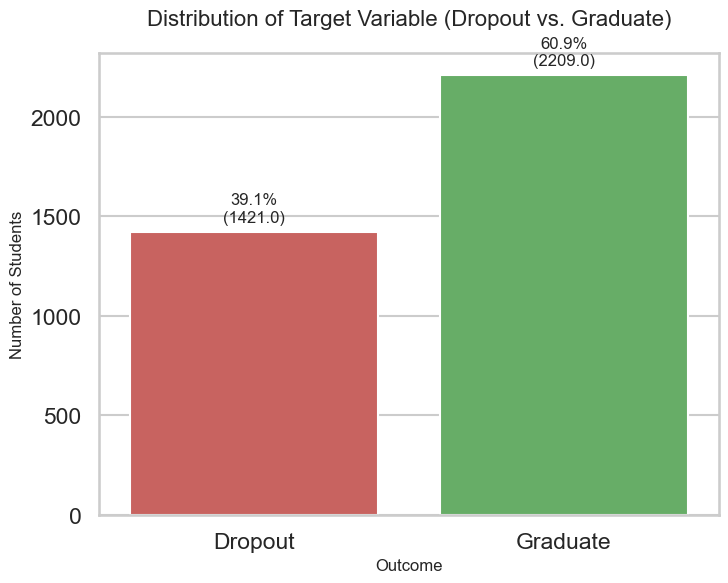

In [ ]:
# --- Step 1.1 - Target Analysis ---

plt.figure(figsize=(8, 6))
sns.countplot(
    data=df_processed,
    x=target_col,
    palette=['#d9534f', '#5cb85c'] # Red for Dropout, Green for Graduate
)
plt.title('Distribution of Target Variable (Dropout vs. Graduate)', fontsize=16, pad=20)
plt.xlabel('Outcome', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)

# Add percentage labels
total = len(df_processed)
ax = plt.gca()
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n({p.get_height()})'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12, xytext=(0, 5), textcoords='offset points')

plt.show()

--- Analyzing Numeric Feature Distributions ---


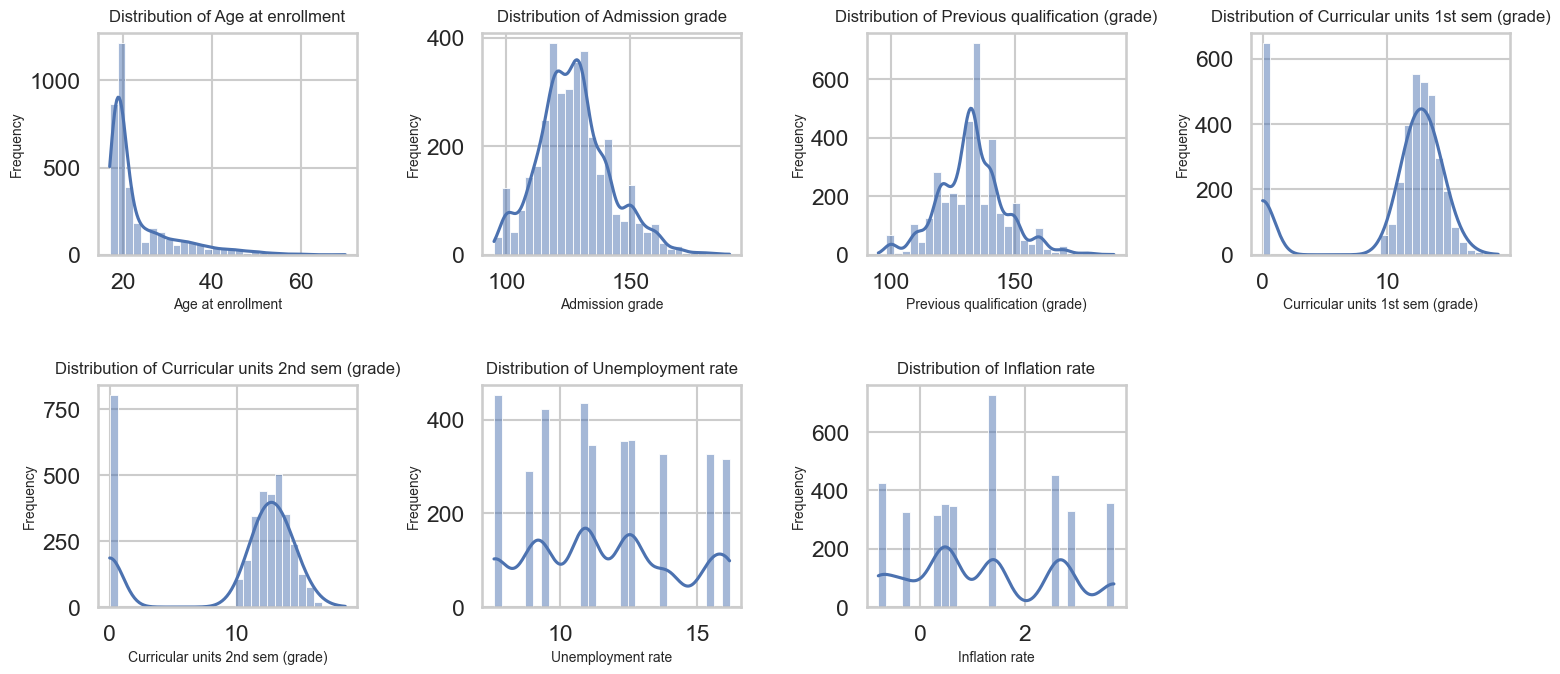

In [ ]:
# --- Step 1.2 - Univariate Analysis (Numeric Features) ---

print("--- Analyzing Numeric Feature Distributions ---")

# Arrange histograms in a 3x4 grid (rows x cols)
rows, cols = 3, 4
fig, axes = plt.subplots(rows, cols, figsize=(cols*4, rows*3.5))
axes = axes.flatten()

# Plot each numeric feature into its subplot
for idx, col in enumerate(numeric_features):
    ax = axes[idx]
    sns.histplot(
        data=df_processed,
        x=col,
        kde=True,  # Kernel Density Estimation
        bins=30,
        ax=ax
    )
    ax.set_title(f'Distribution of {col}', fontsize=12, pad=8)
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)

# Hide any unused subplots if there are fewer features than grid cells
for j in range(len(numeric_features), rows*cols):
    axes[j].set_visible(False)

plt.tight_layout(pad=2.0)
plt.show()

--- Analyzing Categorical Feature Distributions ---


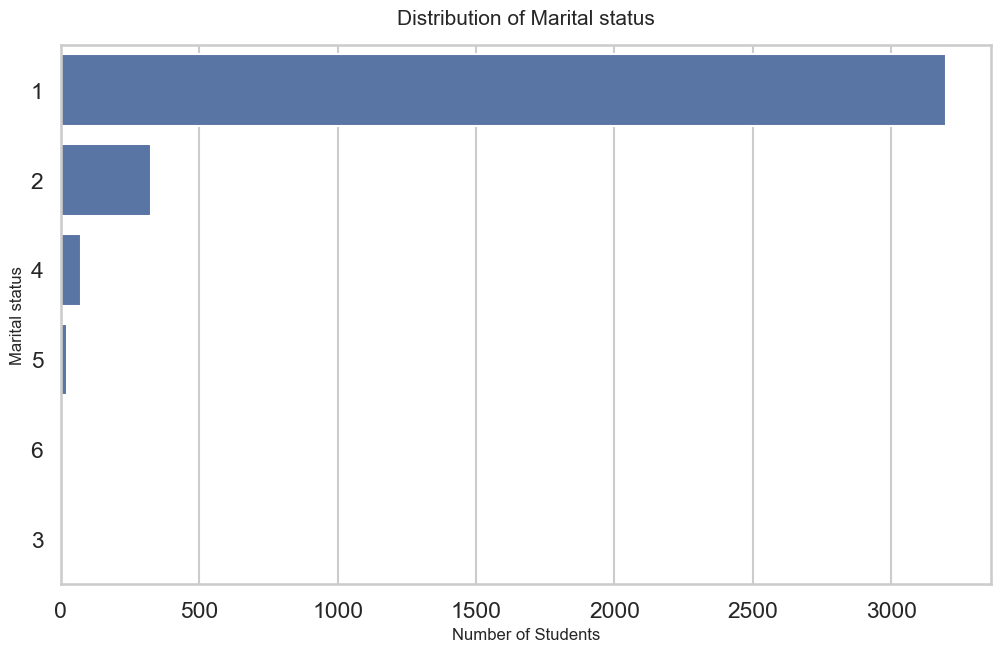

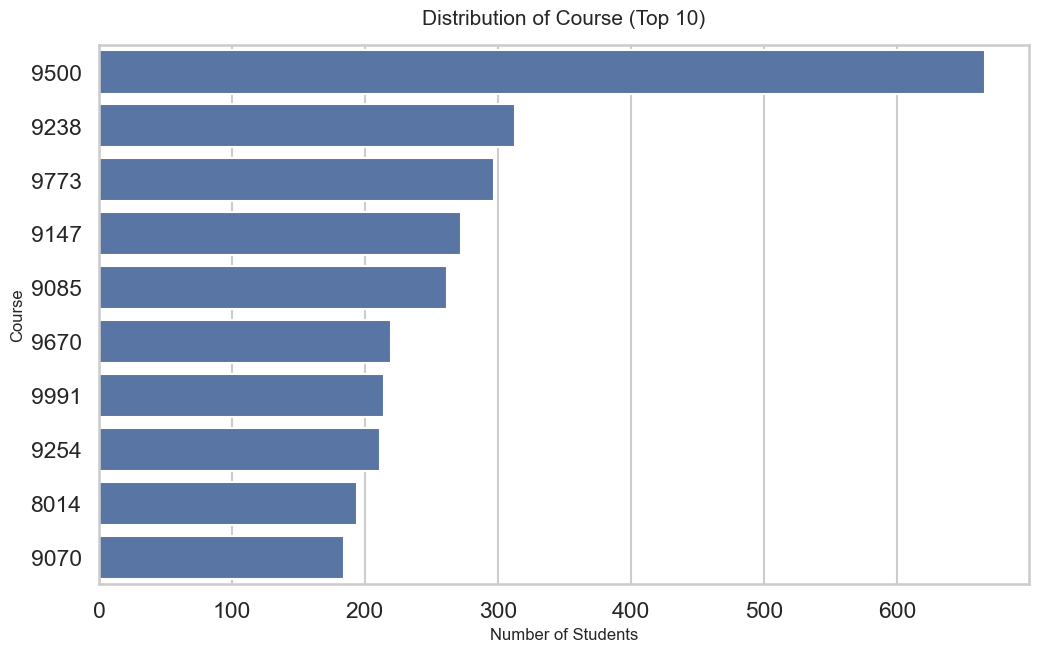

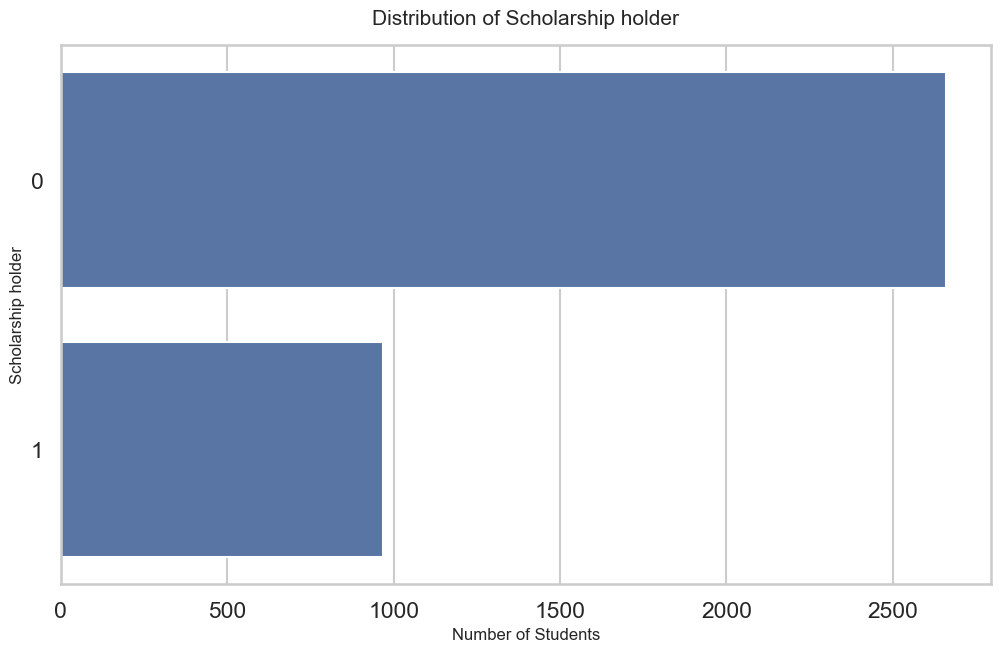

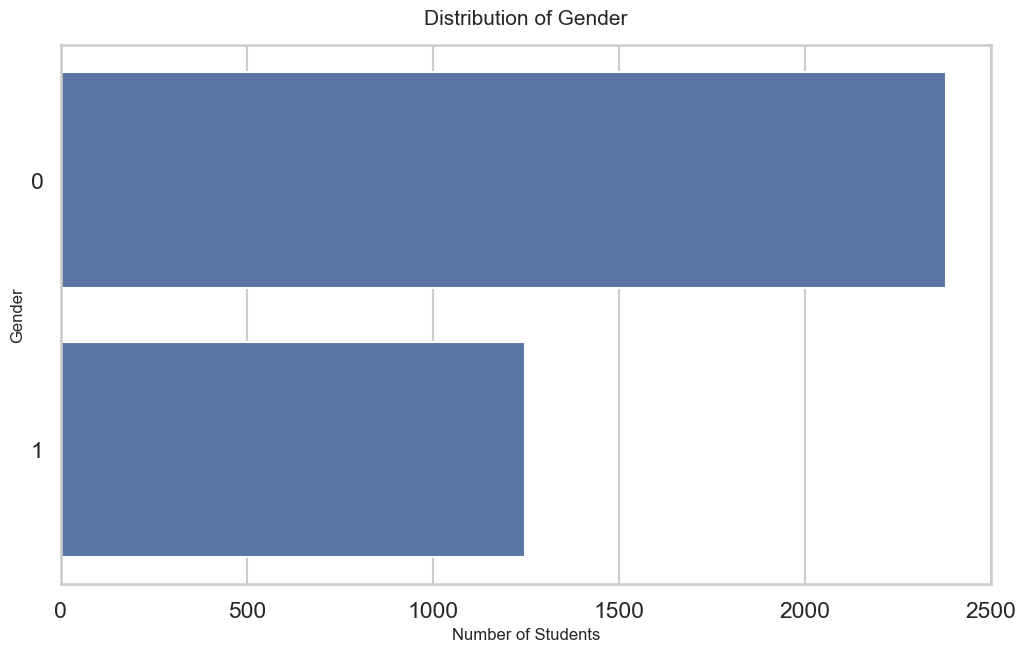

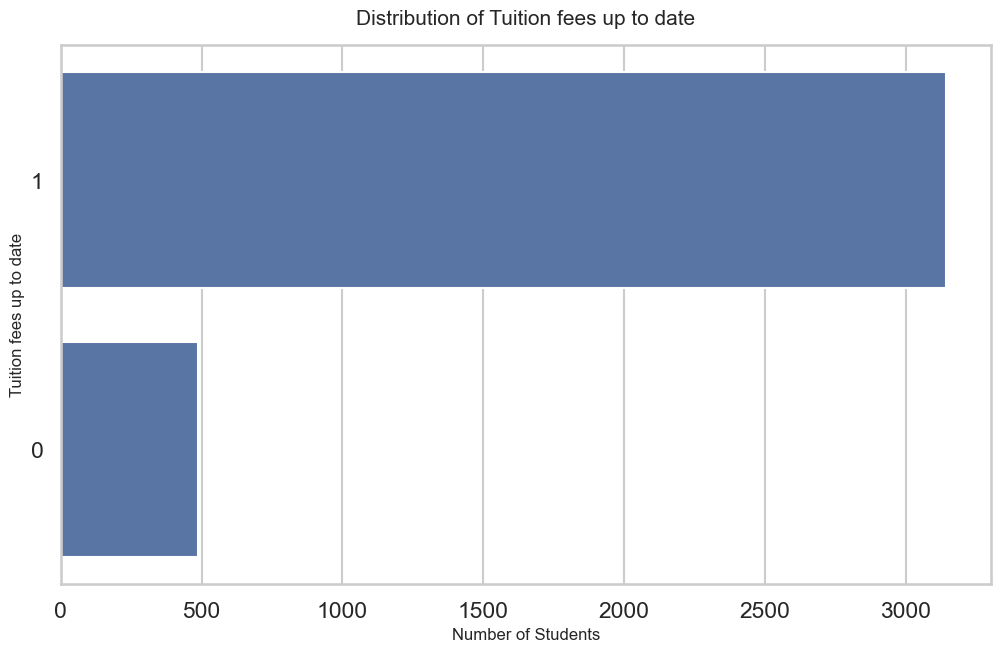

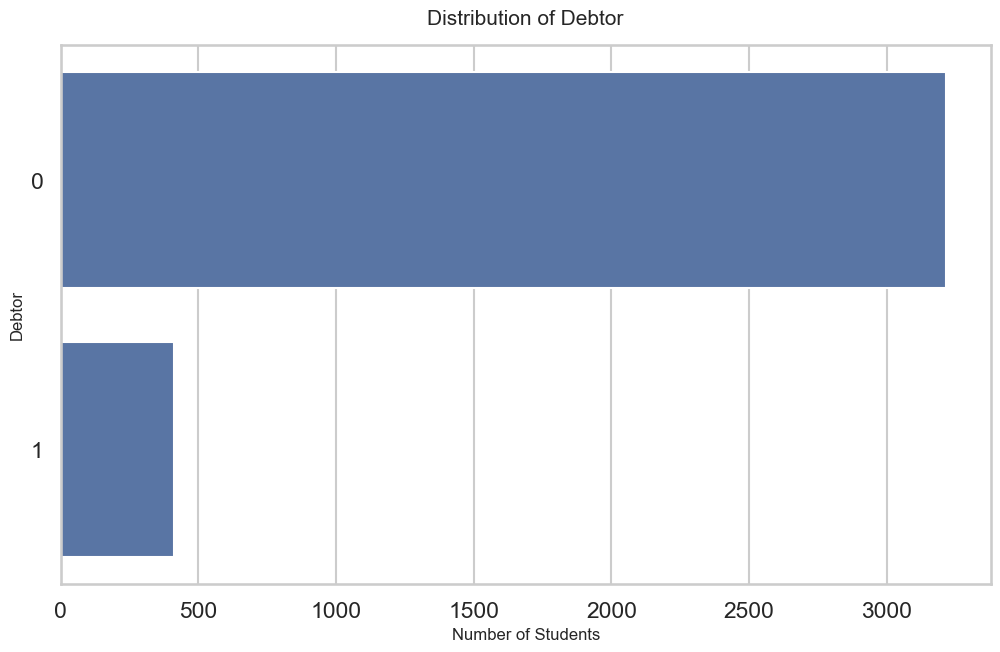

In [ ]:
# --- Step 1.2 - Univariate Analysis (Categorical Features) ---

print("--- Analyzing Categorical Feature Distributions ---")

# Plot count plots for categorical features in a compact grid
n = len(categorical_features)
cols = 2  # number of columns for the grid; change if you prefer
rows = (n + cols - 1) // cols  # ceil division without importing math
fig, axes = plt.subplots(rows, cols, figsize=(cols*6, rows*4))
# Flatten axes array for easy indexing (handles single-row/col cases)
if isinstance(axes, plt.Axes):
    axes = [axes]
else:
    axes = axes.flatten()

for idx, col in enumerate(categorical_features):
    ax = axes[idx]
    # If the feature has too many unique values, we'll plot the top 10
    top_n = 10
    if df_processed[col].nunique() > top_n:
        # Get the top N categories
        top_categories = df_processed[col].value_counts().index[:top_n].tolist()
        # Filter the dataframe to only include these categories
        plot_data = df_processed[df_processed[col].isin(top_categories)]
        title = f'Distribution of {col} (Top {top_n})'
        # Use the original full-data order
        order = df_processed[col].value_counts().index[:top_n]
    else:
        plot_data = df_processed
        title = f'Distribution of {col}'
        order = plot_data[col].value_counts().index

    sns.countplot(
        data=plot_data,
        y=col,  # Use y-axis for readability
        order=order,
        ax=ax
    )
    ax.set_title(title, fontsize=12, pad=8)
    ax.set_xlabel('Number of Students', fontsize=10)
    ax.set_ylabel(col, fontsize=10)

# Hide any unused subplots
for j in range(n, rows*cols):
    axes[j].set_visible(False)

plt.tight_layout(pad=2.0)
plt.show()

--- Analyzing Numeric Features vs. Target ---


C:\Users\ricar\AppData\Local\Temp\ipykernel_25688\3986025273.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


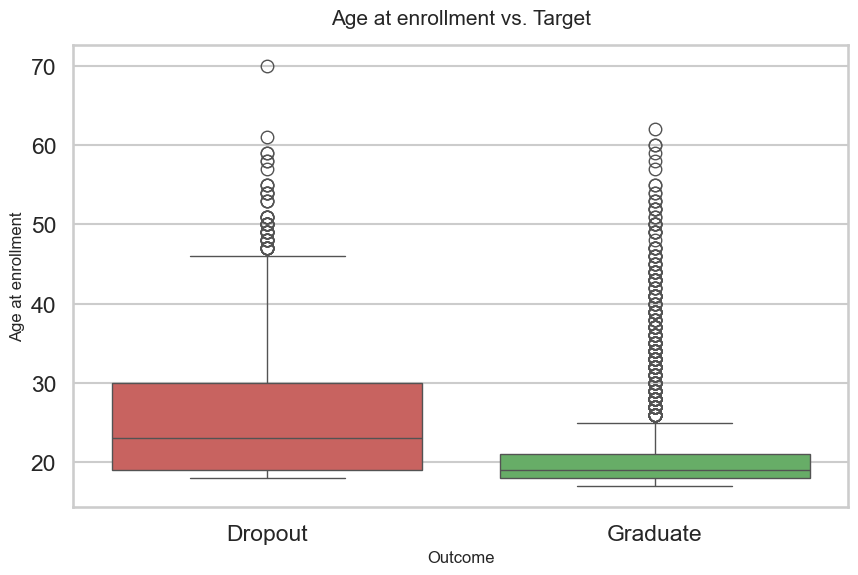

C:\Users\ricar\AppData\Local\Temp\ipykernel_25688\3986025273.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


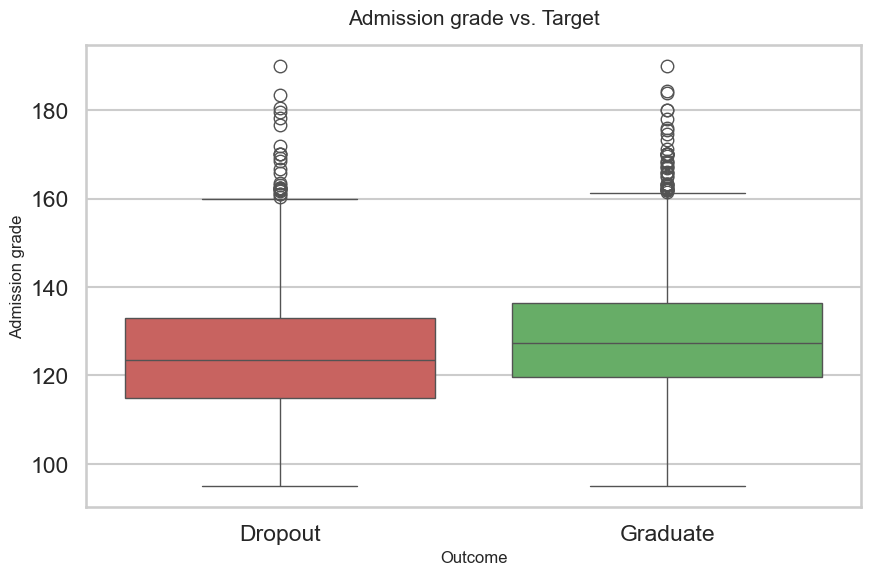

C:\Users\ricar\AppData\Local\Temp\ipykernel_25688\3986025273.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


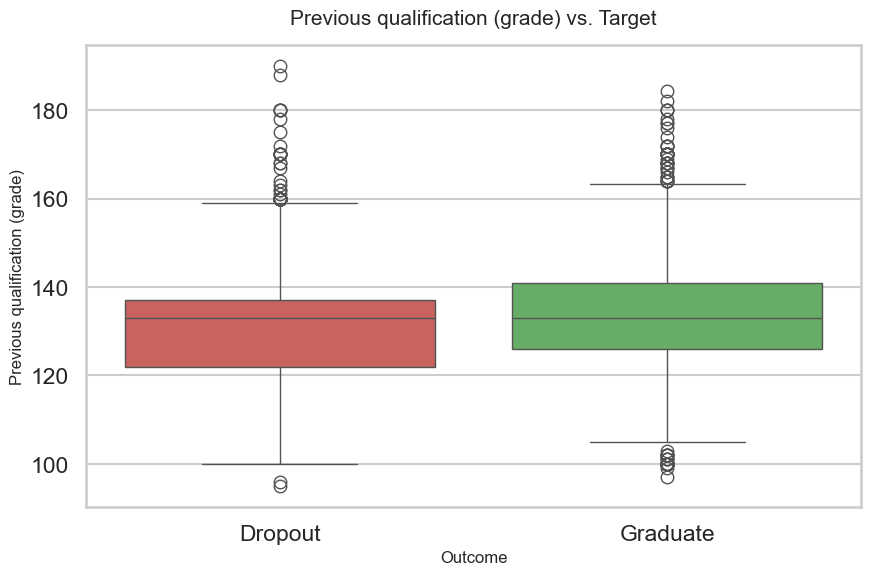

C:\Users\ricar\AppData\Local\Temp\ipykernel_25688\3986025273.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


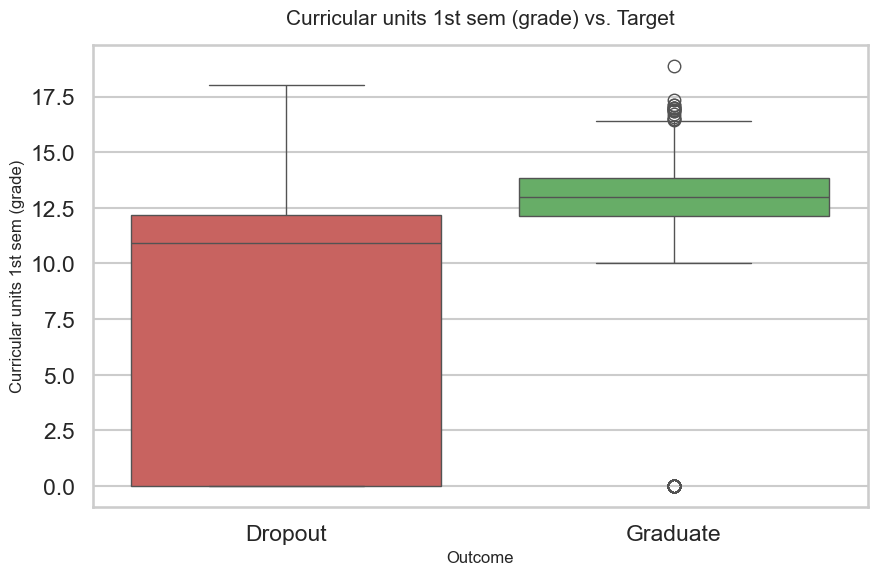

C:\Users\ricar\AppData\Local\Temp\ipykernel_25688\3986025273.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


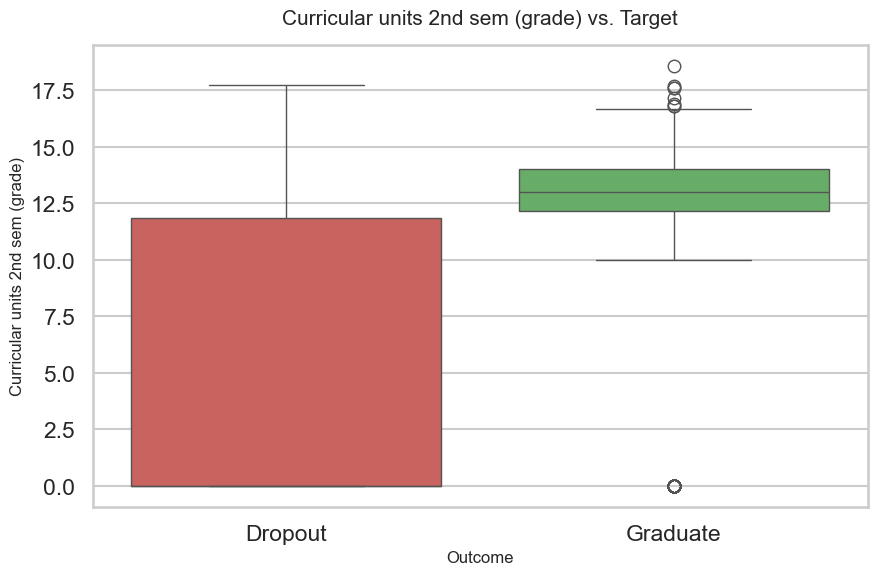

C:\Users\ricar\AppData\Local\Temp\ipykernel_25688\3986025273.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


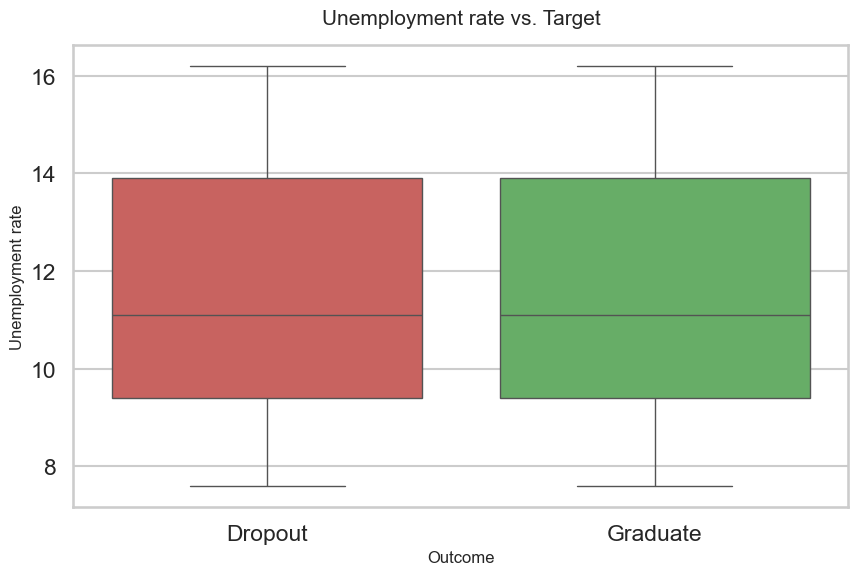

C:\Users\ricar\AppData\Local\Temp\ipykernel_25688\3986025273.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


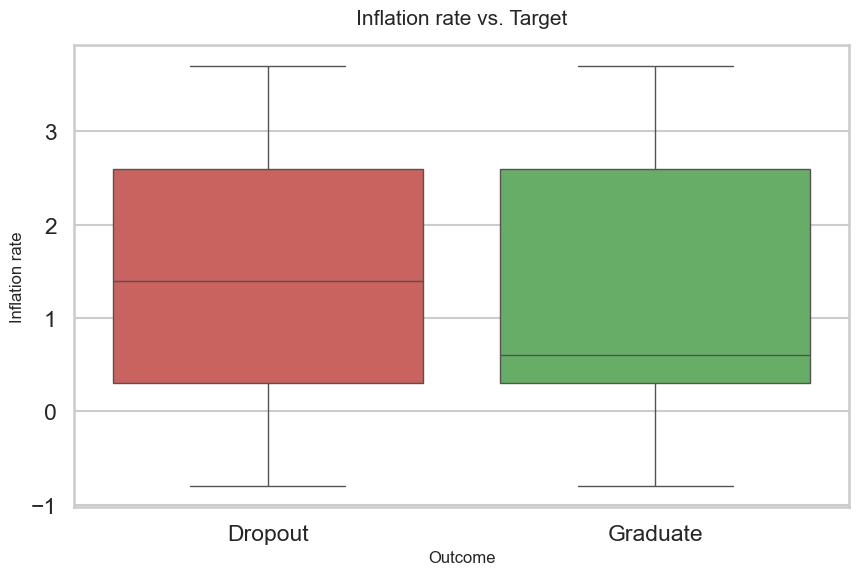

In [ ]:
# --- Step 1.3 - Bivariate Analysis (Numeric vs. Target) ---

print("--- Analyzing Numeric Features vs. Target ---")

for col in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(
        data=df_processed,
        x=target_col,
        y=col,
        palette=['#d9534f', '#5cb85c']
    )
    plt.title(f'{col} vs. {target_col}', fontsize=15, pad=15)
    plt.xlabel('Outcome', fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.show()

--- Analyzing Categorical Features vs. Target (Proportions) ---


C:\Users\ricar\AppData\Local\Temp\ipykernel_25688\3932353652.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Outcome', bbox_to_anchor=(1.05, 1), loc='upper left')


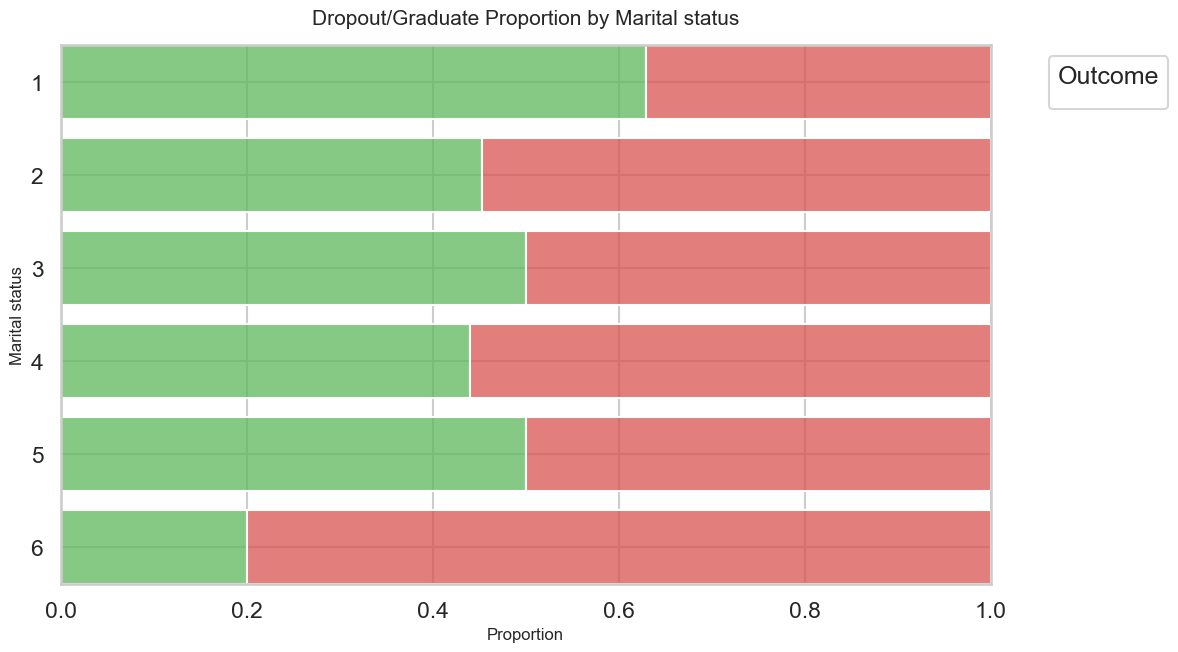

C:\Users\ricar\AppData\Local\Temp\ipykernel_25688\3932353652.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Outcome', bbox_to_anchor=(1.05, 1), loc='upper left')


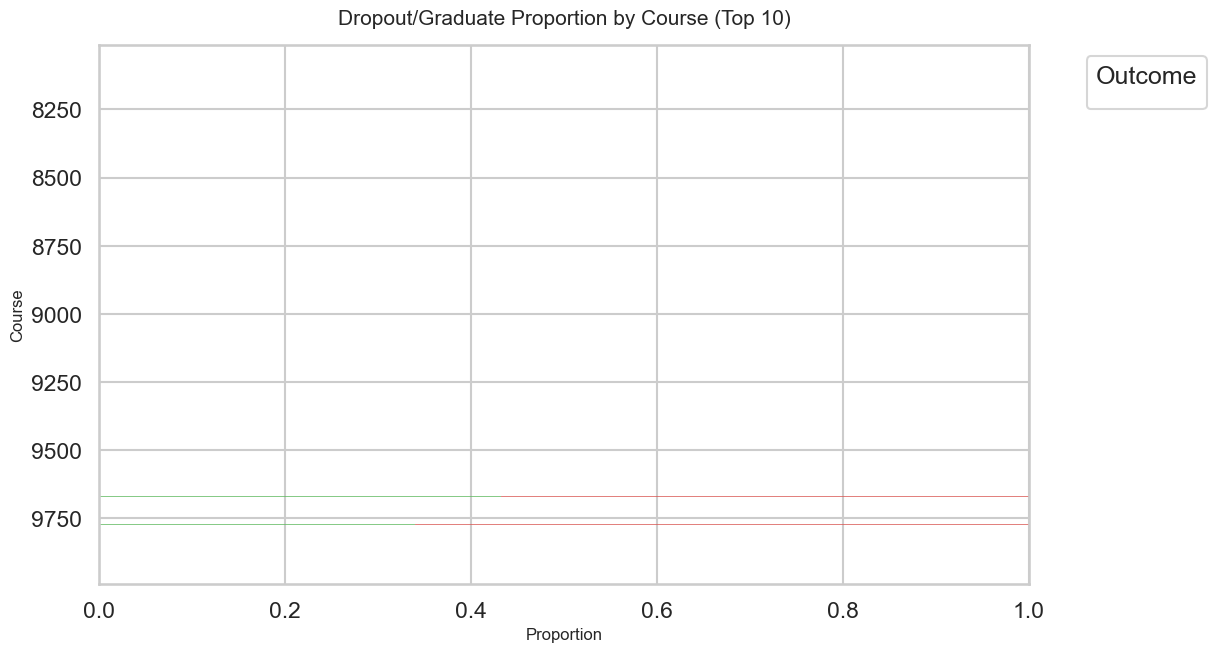

C:\Users\ricar\AppData\Local\Temp\ipykernel_25688\3932353652.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Outcome', bbox_to_anchor=(1.05, 1), loc='upper left')


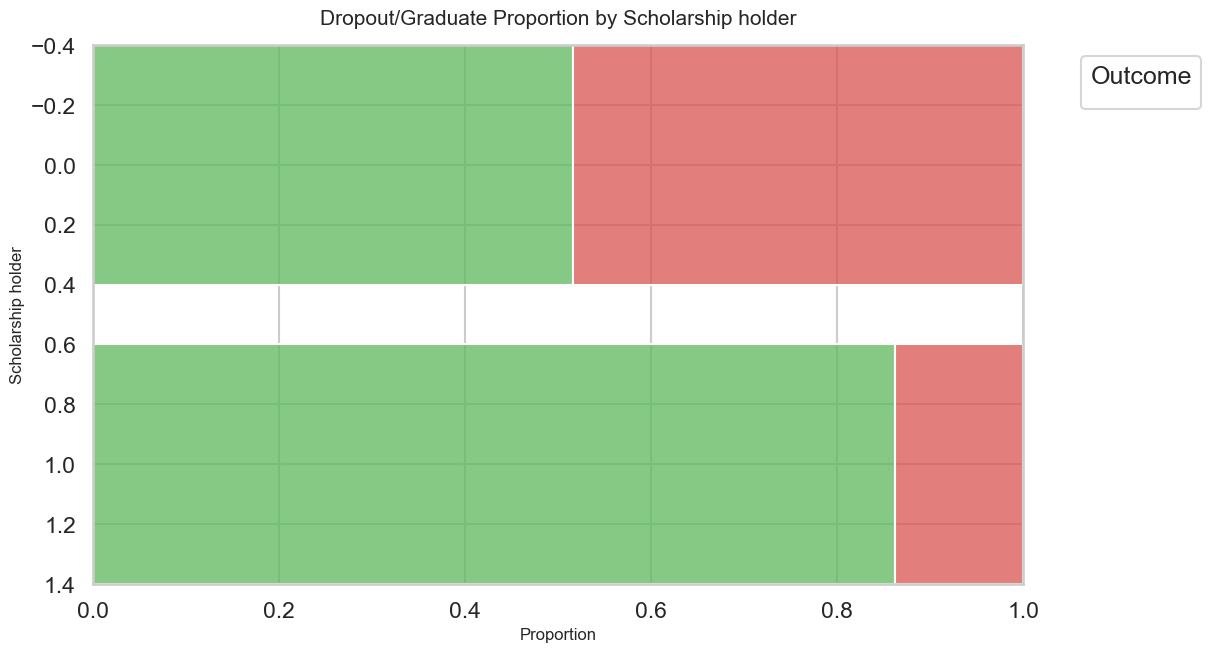

C:\Users\ricar\AppData\Local\Temp\ipykernel_25688\3932353652.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Outcome', bbox_to_anchor=(1.05, 1), loc='upper left')


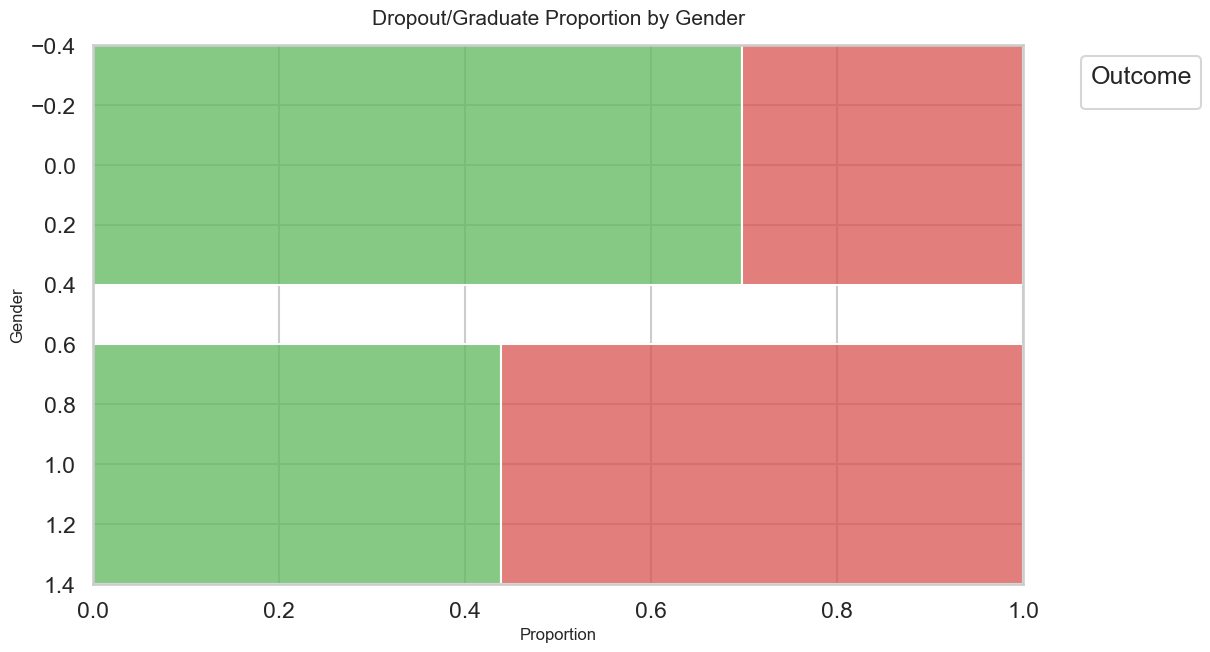

C:\Users\ricar\AppData\Local\Temp\ipykernel_25688\3932353652.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Outcome', bbox_to_anchor=(1.05, 1), loc='upper left')


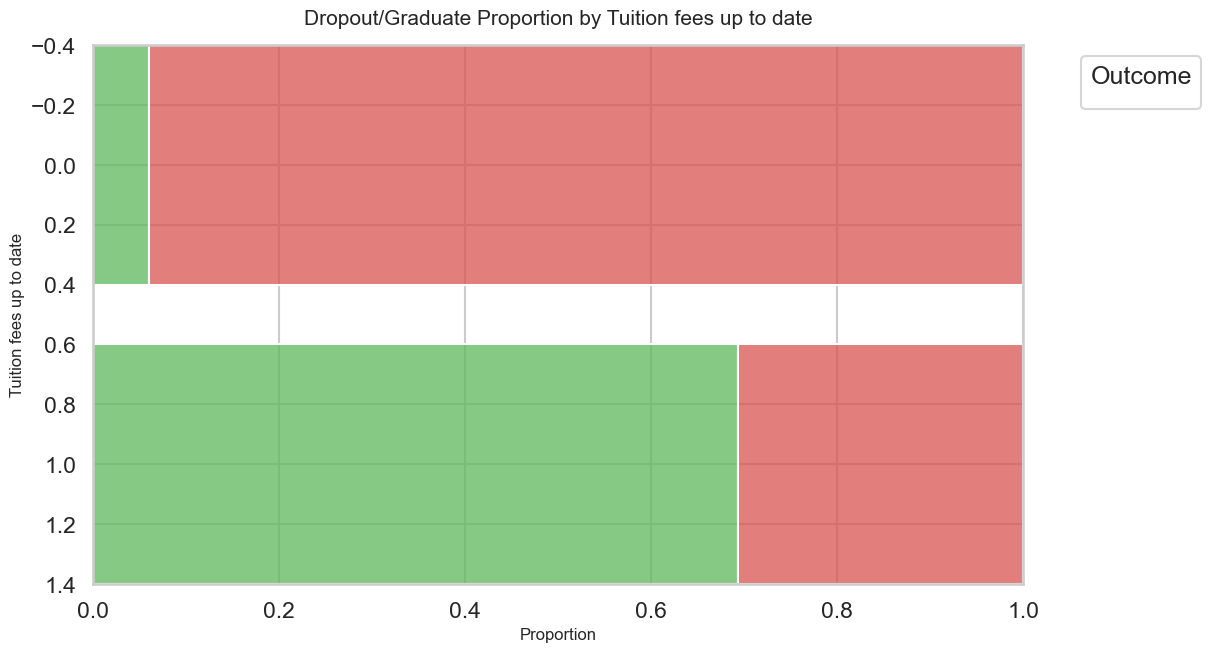

C:\Users\ricar\AppData\Local\Temp\ipykernel_25688\3932353652.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Outcome', bbox_to_anchor=(1.05, 1), loc='upper left')


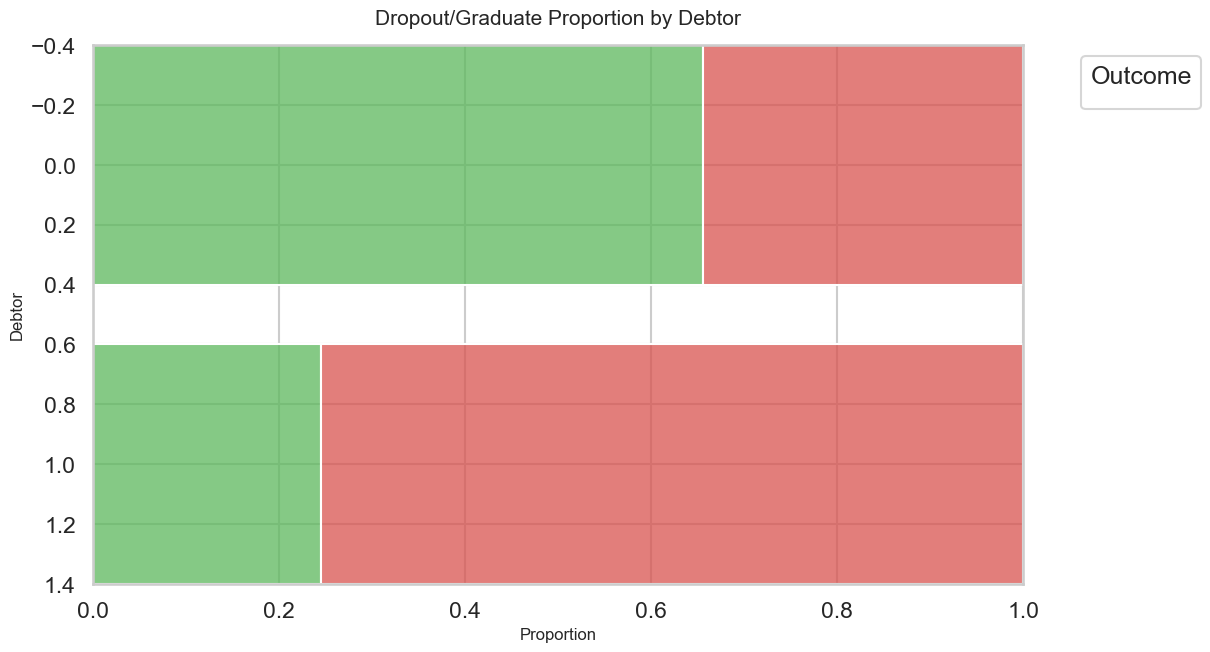

In [ ]:
# --- Step 1.3 - Bivariate Analysis (Categorical vs. Target) ---

print("--- Analyzing Categorical Features vs. Target (Proportions) ---")

for col in categorical_features:
    # If the feature has too many unique values, we'll plot the top 10
    top_n = 10
    if df_processed[col].nunique() > top_n:
        top_categories = df_processed[col].value_counts().index[:top_n].tolist()
        plot_data = df_processed[df_processed[col].isin(top_categories)].copy()
        title = f'Dropout/Graduate Proportion by {col} (Top {top_n})'
        # Use the original full-data order as a list
        order = list(df_processed[col].value_counts().index[:top_n])
    else:
        plot_data = df_processed.copy()
        title = f'Dropout/Graduate Proportion by {col}'
        order = list(plot_data[col].value_counts().index)

    # Ensure the categorical order is respected by converting to Categorical
    plot_data[col] = pd.Categorical(plot_data[col], categories=order, ordered=True)

    plt.figure(figsize=(12, 7))
    # Use 'multiple="fill"' to create a 100% stacked bar chart
    # Note: sns.histplot does not accept 'order' for bar ordering; we set the categorical dtype instead.
    sns.histplot(
        data=plot_data,
        y=col,
        hue=target_col,
        multiple="fill",
        palette=['#d9534f', '#5cb85c'],
        shrink=0.8  # Add some space between bars
    )
    plt.title(title, fontsize=15, pad=15)
    plt.xlabel('Proportion', fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.legend(title='Outcome', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

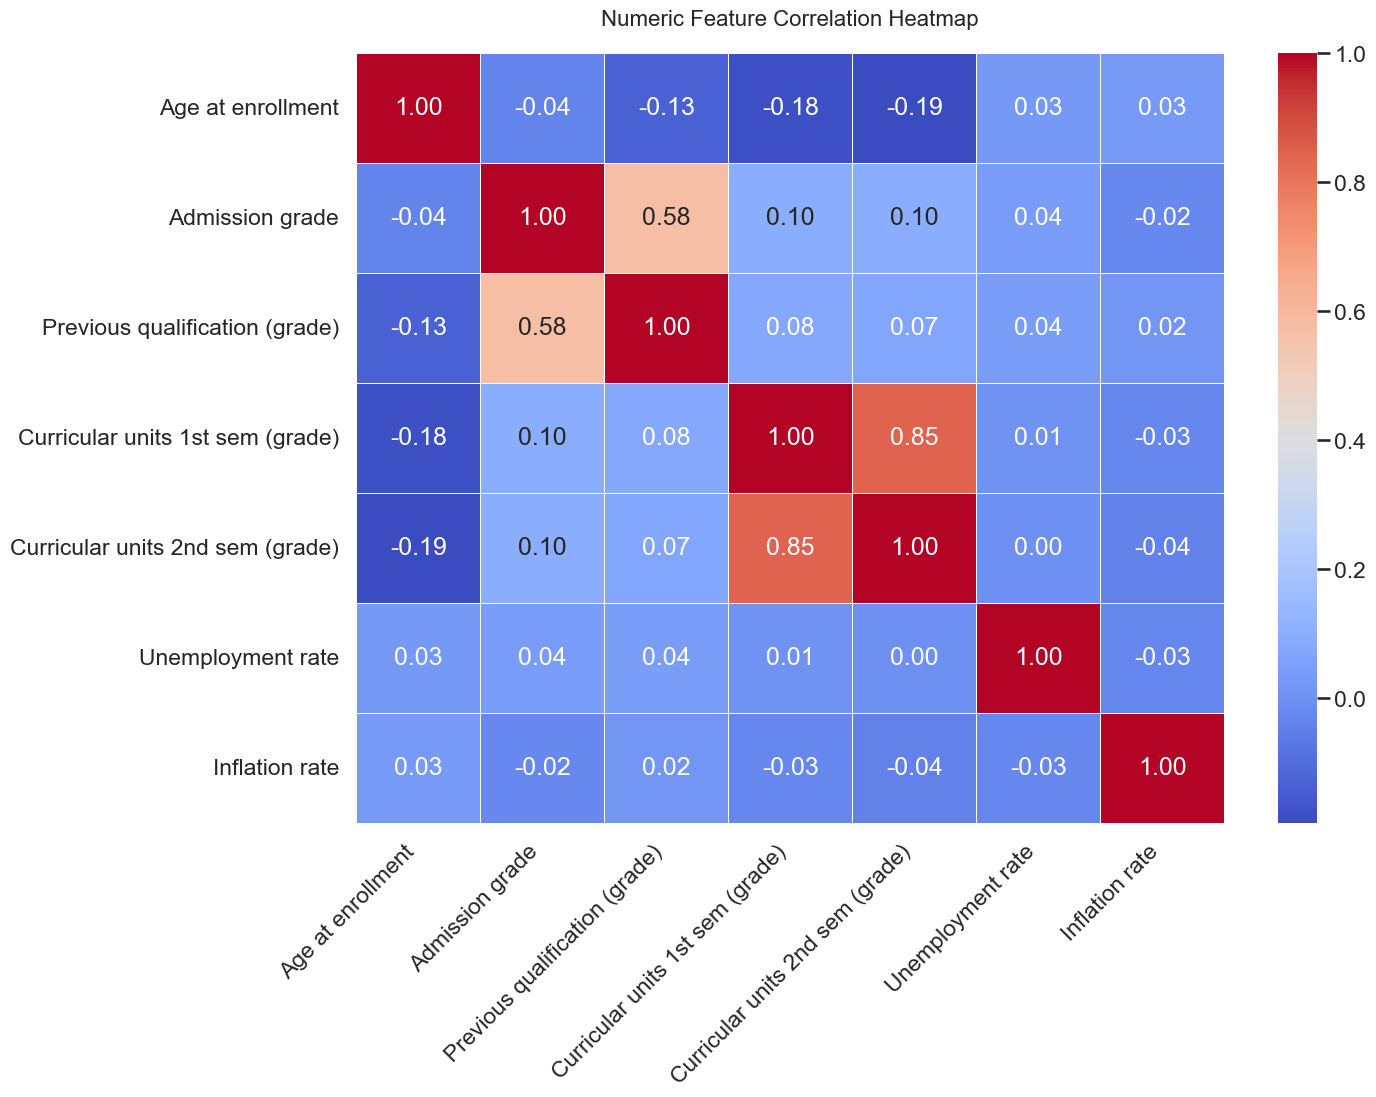

In [ ]:
# --- Step 1.4 - Correlation Analysis (Numeric Features) ---

# Calculate the correlation matrix
corr_matrix = df_processed[numeric_features].corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix,
    annot=True,     # Show the correlation values
    fmt=".2f",      # Format to 2 decimal places
    cmap="coolwarm", # Use a diverging colormap
    linewidths=.5
)
plt.title('Numeric Feature Correlation Heatmap', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

In [12]:
# ---  Step 2 - Data Preprocessing for Dimensionality Reduction ---

print("--- Preprocessing Data for PCA/t-SNE/Clustering ---")

# Create a ColumnTransformer
# This applies different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='drop' # Drop columns not in our feature lists
)

# Apply the transformations
X_scaled = preprocessor.fit_transform(df_processed)

# We also need the feature names after encoding for later
feature_names_numeric = numeric_features
feature_names_categorical = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = np.concatenate([feature_names_numeric, feature_names_categorical])

print(f"Data preprocessed. New shape: {X_scaled.shape}")
print(f"Total features after encoding: {X_scaled.shape[1]}")

--- Preprocessing Data for PCA/t-SNE/Clustering ---
Data preprocessed. New shape: (3630, 38)
Total features after encoding: 38


--- Running PCA ---
Explained variance by PC1: 22.68%
Explained variance by PC2: 16.10%
Total variance explained by 2 components: 38.78%


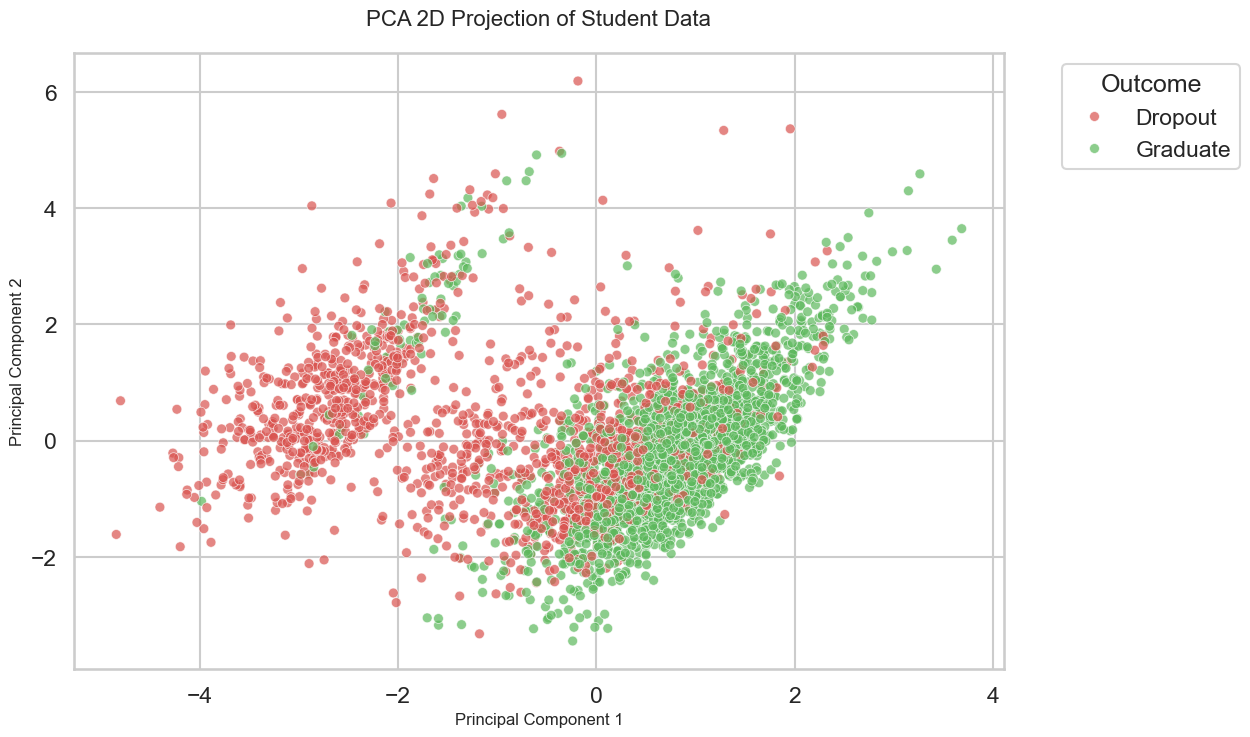

In [13]:
# --- Step 2 - PCA Visualization ---

print("--- Running PCA ---")

# Run PCA to reduce to 2 components
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for easy plotting
df_pca = pd.DataFrame(
    data=X_pca,
    columns=['PC1', 'PC2']
)
df_pca[target_col] = df_processed[target_col].values

print(f"Explained variance by PC1: {pca.explained_variance_ratio_[0]:.2%}")
print(f"Explained variance by PC2: {pca.explained_variance_ratio_[1]:.2%}")
print(f"Total variance explained by 2 components: {np.sum(pca.explained_variance_ratio_):.2%}")

# Plot the PCA results
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_pca,
    x='PC1',
    y='PC2',
    hue=target_col,
    palette=['#d9534f', '#5cb85c'],
    alpha=0.7, # Use transparency
    s=50 # Set marker size
)
plt.title('PCA 2D Projection of Student Data', fontsize=16, pad=20)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Outcome', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

--- Running t-SNE (this may take a moment) ---


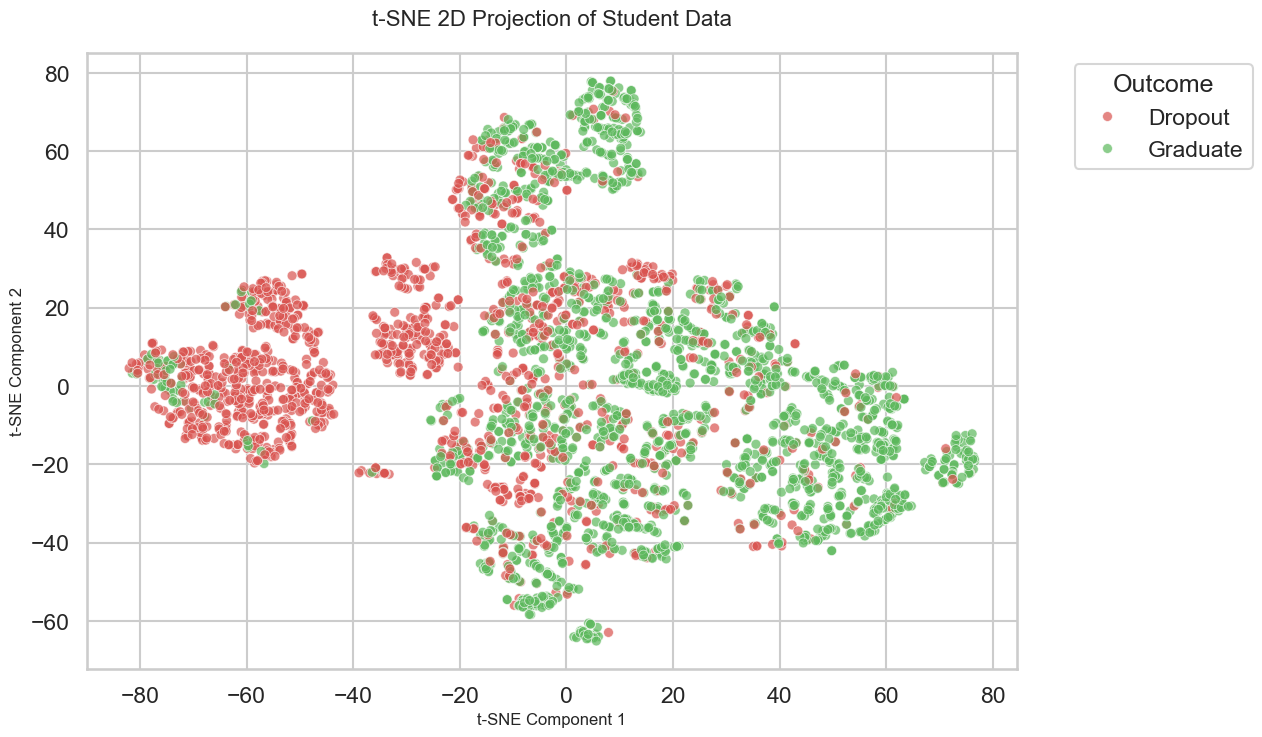

In [16]:
# --- Step 2 - t-SNE Visualization ---

print("--- Running t-SNE (this may take a moment) ---")

# Run t-SNE to reduce to 2 components
# We often run t-SNE on the PCA-reduced data to speed it up and reduce noise
# Let's use the first 50 components from PCA
n_pca_components = min(50, X_scaled.shape[0], X_scaled.shape[1])
X_pca_for_tsne = PCA(n_components=n_pca_components, random_state=42).fit_transform(X_scaled)

tsne = TSNE(
    n_components=2,
    perplexity=30,  # A common default value
    random_state=42,
    init='pca',     # Use PCA for initialization
    learning_rate='auto'
)
X_tsne = tsne.fit_transform(X_pca_for_tsne)

# Create a DataFrame for easy plotting
df_tsne = pd.DataFrame(
    data=X_tsne,
    columns=['t-SNE 1', 't-SNE 2']
)
df_tsne[target_col] = df_processed[target_col].values

# Plot the t-SNE results
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_tsne,
    x='t-SNE 1',
    y='t-SNE 2',
    hue=target_col,
    palette=['#d9534f', '#5cb85c'],
    alpha=0.7,
    s=50
)
plt.title('t-SNE 2D Projection of Student Data', fontsize=16, pad=20)
plt.xlabel('t-SNE Component 1', fontsize=12)
plt.ylabel('t-SNE Component 2', fontsize=12)
plt.legend(title='Outcome', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [15]:
# --- Step 3 - Finding Prototypes (K-Medoids) ---

print("--- Finding Prototypes using K-Medoids ---")

# We will find 6 prototypes: 3 for 'Dropout' and 3 for 'Graduate'
# To do this, we run K-Medoids on each subset
n_prototypes_per_class = 3

# Get the scaled data for each class
X_scaled_dropout = X_scaled[df_processed[target_col] == 'Dropout']
X_scaled_graduate = X_scaled[df_processed[target_col] == 'Graduate']

# Get the original (unscaled) data for each class
df_dropout = df_processed[df_processed[target_col] == 'Dropout']
df_graduate = df_processed[df_processed[target_col] == 'Graduate']


# --- Find Dropout Prototypes ---
kmedoids_dropout = KMedoids(
    n_clusters=n_prototypes_per_class,
    random_state=42,
    metric='euclidean' # Use standard distance
).fit(X_scaled_dropout)

# Get the indices of the prototypes (medoids) *within the dropout subset*
prototype_indices_dropout = kmedoids_dropout.medoid_indices_

# Get the actual prototype data from the *original* (unscaled) dataframe
prototypes_dropout = df_dropout.iloc[prototype_indices_dropout][numeric_features + categorical_features + [target_col]]


# --- Find Graduate Prototypes ---
kmedoids_graduate = KMedoids(
    n_clusters=n_prototypes_per_class,
    random_state=42,
    metric='euclidean'
).fit(X_scaled_graduate)

# Get the indices of the prototypes (medoids) *within the graduate subset*
prototype_indices_graduate = kmedoids_graduate.medoid_indices_

# Get the actual prototype data from the *original* (unscaled) dataframe
prototypes_graduate = df_graduate.iloc[prototype_indices_graduate][numeric_features + categorical_features + [target_col]]


# --- Display Prototypes ---
print("\n--- PROTOTYPES (Typical Students) ---")
print("\n=== Typical 'Dropout' Students ===")
display(prototypes_dropout)

print("\n=== Typical 'Graduate' Students ===")
display(prototypes_graduate)

--- Finding Prototypes using K-Medoids ---


NameError: name 'KMedoids' is not defined